In [2]:
# Task 3: Implement OLAP Analysis

**Business Case:** Identify the company's lowest-performing products to consider for discontinuation or repositioning strategies.

This notebook implements an OLAP-style analysis using Python and pandas, working from the cleaned data files located in the project repository.


SyntaxError: unterminated string literal (detected at line 3) (2932073497.py, line 3)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid')

# Load cleaned CSVs from local folder
sales_df = pd.read_csv('/Users/alijah/Projects/smart-store-aaroe/data/prepared/sales_data_cleaned.csv')
products_df = pd.read_csv('/Users/alijah/Projects/smart-store-aaroe/data/prepared/products_data_cleaned.csv')

# Preview sales data
print("Sales Data:")
display(sales_df.head())

# Preview product data
print("Product Data:")
display(products_df.head())



Sales Data:


,transactionid,saledate,customerid,productid,storeid,campaignid,saleamount,discountpercent,paymenttype
0,550,1/6/2024,1008,102,404,0,39.10,0,Debit
1,551,1/6/2024,1009,105,403,0,19.78,0,ApplePay
2,554,1/25/2024,1005,102,405,0,117.30,0,Credit
3,556,1/29/2024,1009,104,403,0,172.40,0,Credit
4,559,2/6/2024,1001,106,401,0,622.86,0,Credit


Product Data:


,productid,productname,category,unitprice,stockquantity,subcategory
0,102,hoodie,Clothing,39.10,100,Apparel
1,104,hat,Clothing,43.10,150,Apparel
2,105,football,Sports,19.78,75,Outdoor
3,106,controller,Electronics,88.98,120,Accessories
4,107,jacket,Clothing,67.02,80,Apparel


In [9]:
# Drop incorrect 'hat' product with duplicate productid 107
products_df = products_df[~((products_df['productid'] == 107) & (products_df['productname'] == 'hat'))]

# Confirm it's gone
display(products_df[products_df['productid'] == 107])


,productid,productname,category,unitprice,stockquantity,subcategory
4,107,jacket,Clothing,67.02,80,Apparel


In [10]:
# Merge the sales and product datasets on productid
merged_df = pd.merge(sales_df, products_df, on='productid')

# Preview the merged data
print("Merged Data Sample:")
display(merged_df.head())


Merged Data Sample:


,transactionid,saledate,customerid,productid,storeid,campaignid,saleamount,discountpercent,paymenttype,productname,category,unitprice,stockquantity,subcategory
0,550,1/6/2024,1008,102,404,0,39.10,0,Debit,hoodie,Clothing,39.10,100,Apparel
1,551,1/6/2024,1009,105,403,0,19.78,0,ApplePay,football,Sports,19.78,75,Outdoor
2,554,1/25/2024,1005,102,405,0,117.30,0,Credit,hoodie,Clothing,39.10,100,Apparel
3,556,1/29/2024,1009,104,403,0,172.40,0,Credit,hat,Clothing,43.10,150,Apparel
4,559,2/6/2024,1001,106,401,0,622.86,0,Credit,controller,Electronics,88.98,120,Accessories


In [11]:
# Group by product and calculate total number of sales and revenue
product_sales = merged_df.groupby(['productid', 'productname', 'category']) \
                         .agg(TotalSales=('transactionid', 'count'),
                              TotalRevenue=('saleamount', 'sum')) \
                         .reset_index()

# Sort to find lowest-performing products
lowest_performers = product_sales.sort_values(by='TotalSales', ascending=True)

# Preview results
display(lowest_performers.head())


,productid,productname,category,TotalSales,TotalRevenue
3,106,controller,Electronics,5,2046.54
2,105,football,Sports,6,454.94
4,107,jacket,Clothing,6,2077.62
1,104,hat,Clothing,7,1810.20
0,102,hoodie,Clothing,10,1524.90


In [12]:
# Select the bottom 5 products
bottom_5 = lowest_performers.head(5)

# Display the results
print("Bottom 5 Products by Total Sales:")
display(bottom_5)


Bottom 5 Products by Total Sales:


,productid,productname,category,TotalSales,TotalRevenue
3,106,controller,Electronics,5,2046.54
2,105,football,Sports,6,454.94
4,107,jacket,Clothing,6,2077.62
1,104,hat,Clothing,7,1810.20
0,102,hoodie,Clothing,10,1524.90


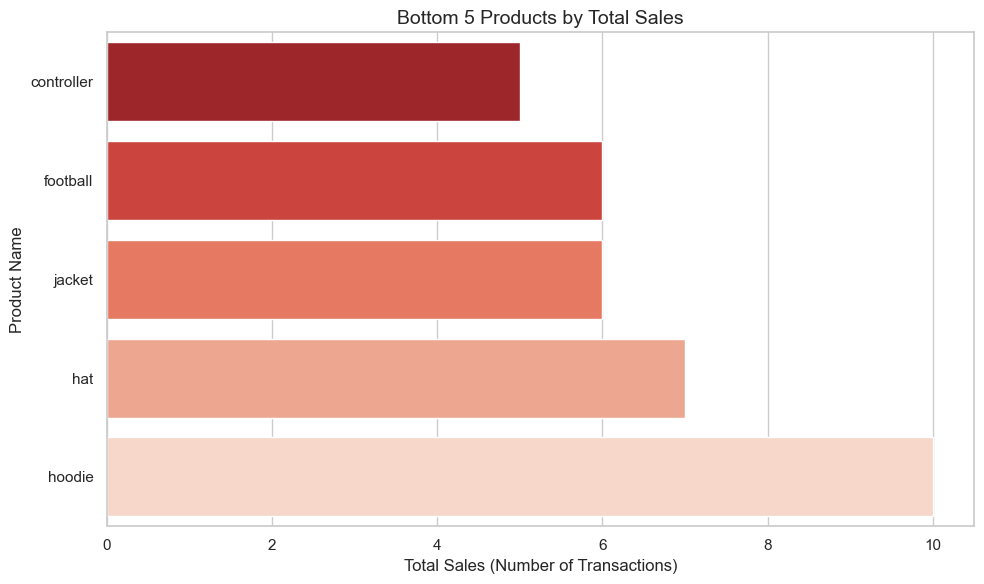

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style (optional but makes it look clean)
sns.set(style='whitegrid')

# Create the figure
plt.figure(figsize=(10, 6))

# Plot bottom 5 products using hue to apply color palette correctly
sns.barplot(
    x='TotalSales',
    y='productname',
    hue='productname',          # Assign hue to apply color
    data=bottom_5,
    palette='Reds_r',           # Red reversed for emphasis
    dodge=False,                # Keep bars aligned vertically
    legend=False                # Hide legend (not needed here)
)

# Add labels and title
plt.title('Bottom 5 Products by Total Sales', fontsize=14)
plt.xlabel('Total Sales (Number of Transactions)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


In [18]:
# Filter merged data to only include the bottom 5 products
bottom_5_ids = bottom_5['productid'].unique()
bottom_5_df = merged_df[merged_df['productid'].isin(bottom_5_ids)]

# Preview
display(bottom_5_df.head())



,transactionid,saledate,customerid,productid,storeid,campaignid,saleamount,discountpercent,paymenttype,productname,category,unitprice,stockquantity,subcategory
0,550,1/6/2024,1008,102,404,0,39.10,0,Debit,hoodie,Clothing,39.10,100,Apparel
1,551,1/6/2024,1009,105,403,0,19.78,0,ApplePay,football,Sports,19.78,75,Outdoor
2,554,1/25/2024,1005,102,405,0,117.30,0,Credit,hoodie,Clothing,39.10,100,Apparel
3,556,1/29/2024,1009,104,403,0,172.40,0,Credit,hat,Clothing,43.10,150,Apparel
4,559,2/6/2024,1001,106,401,0,622.86,0,Credit,controller,Electronics,88.98,120,Accessories


In [20]:

# Group by product and store
store_perf = bottom_5_df.groupby(['productid', 'productname', 'storeid']) \
                        .agg(TotalSales=('transactionid', 'count')) \
                        .reset_index()

# Preview results
display(store_perf.head())


,productid,productname,storeid,TotalSales
0,102,hoodie,402,1
1,102,hoodie,403,3
2,102,hoodie,404,3
3,102,hoodie,405,2
4,102,hoodie,406,1


In [21]:
# Pivot: product rows, store columns
store_pivot = store_perf.pivot(index='productname', columns='storeid', values='TotalSales').fillna(0)

# Preview pivoted table
display(store_pivot)


storeid,401,402,403,404,405,406
productname,,,,,,
controller,1.0,1.0,0.0,0.0,3.0,0.0
football,2.0,0.0,1.0,0.0,2.0,1.0
hat,1.0,2.0,1.0,0.0,2.0,1.0
hoodie,0.0,1.0,3.0,3.0,2.0,1.0
jacket,2.0,3.0,0.0,0.0,0.0,1.0


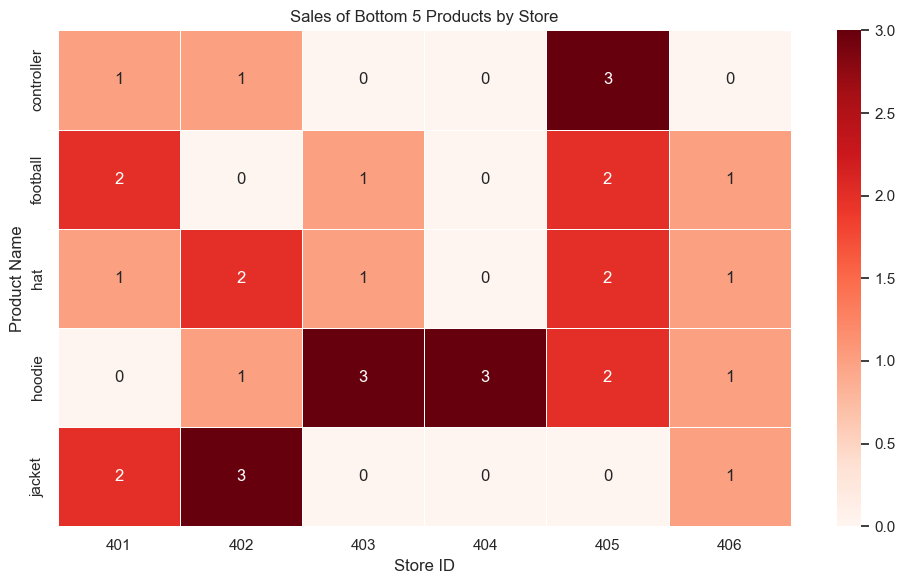

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(store_pivot, cmap='Reds', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Sales of Bottom 5 Products by Store')
plt.xlabel('Store ID')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


In [23]:
# Already done:
# store_pivot = productname (rows) x storeid (columns)

display(store_pivot)


storeid,401,402,403,404,405,406
productname,,,,,,
controller,1.0,1.0,0.0,0.0,3.0,0.0
football,2.0,0.0,1.0,0.0,2.0,1.0
hat,1.0,2.0,1.0,0.0,2.0,1.0
hoodie,0.0,1.0,3.0,3.0,2.0,1.0
jacket,2.0,3.0,0.0,0.0,0.0,1.0


In [24]:
# Calculate total sales across all stores for each product
store_pivot['TotalSales'] = store_pivot.sum(axis=1)

# Apply simple rule-based logic for strategy
def classify_strategy(sales_row):
    total_sales = sales_row['TotalSales']
    sales_per_store = sales_row.drop('TotalSales')

    if total_sales <= 5:
        return 'Discontinue'
    elif (sales_per_store > 0).sum() <= 2:  # only performing in 2 or fewer stores
        return 'Reposition'
    else:
        return 'Review Further'

# Add strategy column
store_pivot['RecommendedAction'] = store_pivot.apply(classify_strategy, axis=1)

# Preview the result
display(store_pivot[['TotalSales', 'RecommendedAction']])


storeid,TotalSales,RecommendedAction
productname,,
controller,5.0,Discontinue
football,6.0,Review Further
hat,7.0,Review Further
hoodie,10.0,Review Further
jacket,6.0,Review Further


In [25]:
### Goal 3: Strategic Recommendations

Based on store-level sales performance, the following actions are recommended for the bottom 5 products:

- **Discontinue** products with universally poor performance
- **Reposition** products that are underperforming in most locations but have pockets of demand
- **Review Further** for edge cases that may need deeper analysis (e.g., margin, seasonality, or customer reviews)


SyntaxError: invalid syntax (2863387777.py, line 3)

In [27]:
# Reset index so productname is a column, and select relevant columns
recommendations = store_pivot.reset_index()[['productname', 'TotalSales', 'RecommendedAction']]
display(recommendations)


storeid,productname,TotalSales,RecommendedAction
0,controller,5.0,Discontinue
1,football,6.0,Review Further
2,hat,7.0,Review Further
3,hoodie,10.0,Review Further
4,jacket,6.0,Review Further


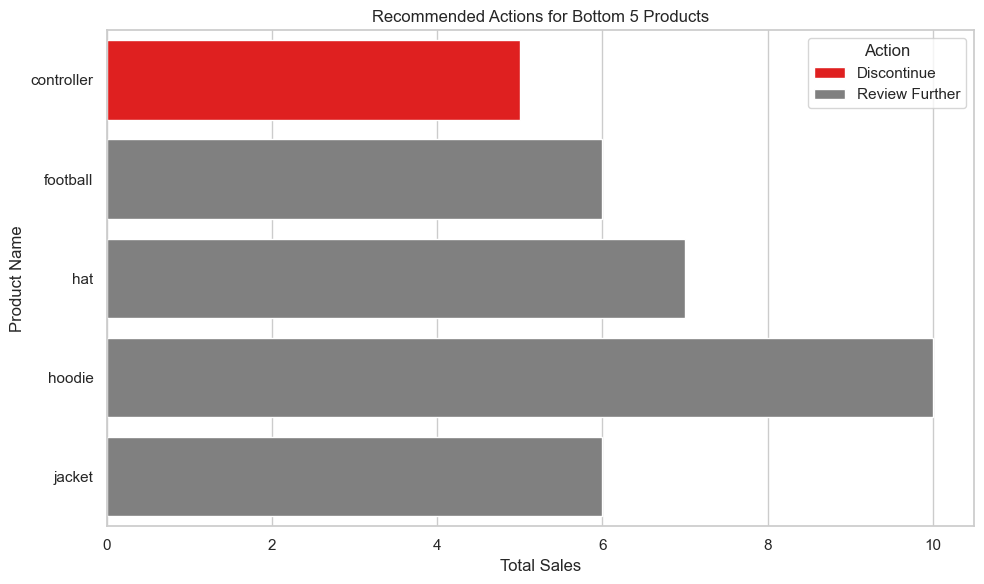

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='TotalSales',
    y='productname',
    hue='RecommendedAction',
    data=recommendations,
    palette={'Discontinue': 'red', 'Reposition': 'orange', 'Review Further': 'gray'}
)

plt.title('Recommended Actions for Bottom 5 Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.legend(title='Action')
plt.tight_layout()
plt.show()


In [29]:
import os

# Create an 'output' folder if it doesn't exist
os.makedirs('/Users/alijah/Projects/smart-store-aaroe/output', exist_ok=True)

# Export the recommendations to CSV
recommendations.to_csv('/Users/alijah/Projects/smart-store-aaroe/output/bottom5_recommendations.csv', index=False)
